# **scNET: Learning Context-Specific Gene and Cell Embeddings by Integrating Single-Cell Gene Expression Data with Protein-Protein Interaction Information**

**Install scnet using pip**

In [1]:
!pip install scnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.

**Download example data**

In [ ]:
import gdown
download_url = f'https://drive.google.com/uc?id=1CQu1aZDVfLSu4Tfuj5Qv3HGw-RnHAWIL'
output_path = './example.h5ad'
gdown.download(download_url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1CQu1aZDVfLSu4Tfuj5Qv3HGw-RnHAWIL
From (redirected): https://drive.google.com/uc?id=1CQu1aZDVfLSu4Tfuj5Qv3HGw-RnHAWIL&confirm=t&uuid=ded2173a-b3a6-45d2-ab5c-4f506a1d01e2
To: /content/example.h5ad
 66%|██████▋   | 916M/1.38G [00:18<00:07, 65.4MB/s]

# Import scNET and model traning

In [ ]:
import scNET
#For faster processing in medium to large datasets (e.g. 30K or above cells), the maximum cells batch size can be increased depending on the available GPU memory.

#For GPU with 24GB memory
scNET.main.MAX_CELLS_BATCH_SIZE = 3000

#for GPU with 40GB memory
scNET.main.MAX_CELLS_BATCH_SIZE = 4000

#For GPU with 80GB memory or more
scNET.main.MAX_CELLS_BATCH_SIZE = 8000

#otherwize, do not change the default value

In [ ]:
#To control the cutoff of gene expression, the minimum precetage of cells expressing a gene can be adjusted. The default all expressed genes are considered.
#For example, to consider genes expressed in at least 5% of cells
scNET.main.EXPRESSION_CUTOFF = 0.05

In [ ]:
#For larger dataset (10K or above), containing larger number of subcommunities, the number of encoder layers could be increased to 4 or more. the default value is 3.
scNET.main.NUM_LAYERS = 3

## run_scNET arguments:
 **obj (AnnData, optional):** AnnData obj.

  **pre_processing_flag (bool, optional):** If True, perform pre-processing steps.

  **human_flag (bool, optional):** Controls gene name casing in the network.

  **number_of_batches (int, optional):** Number of mini-batches for the training.

  **split_cells (bool, optional):** If True, split by cells instead of edges during training. If using A100 could be True (for 10K cells or less)

  **n_neighbors (int, optional):** Number of neighbors for building the adjacency graph.

  **max_epoch (int, optional):** Max number of epochs for model training (recommended 300, for larger dataset consider also 350).

  **model_name (str, optional):** Identifier for saving the model outputs.
  
  **save_model_flag (bool, optional):** If True, save the trained model.

In [ ]:
import scanpy as sc
obj = sc.read_h5ad("./example.h5ad")
scNET.run_scNET(obj, pre_processing_flag=False, human_flag=False, number_of_batches=10, split_cells=True, max_epoch=300, model_name = "test")



# Using the model's outputs

**Load all the relevant embeddings**


In [ ]:
embedded_genes, embedded_cells, node_features , out_features =  scNET.load_embeddings("test")

**Create Scanpy object based on the reconstructed gene expression**


In [ ]:
cell_types = {"0":"Macrophages","1":"Macrophages","2":"CD8 Tcells","3":"Microglia","4":"Cancer","5":"CD4 Tcells","6":"B Cells","10":"Prolifrating Tcells","8":"Cancer","11":"NK"}
obj.obs["Cell Type"] = obj.obs.seurat_clusters.map(cell_types)
recon_obj = scNET.create_reconstructed_obj(node_features, out_features, obj)

**Plot marker genes**

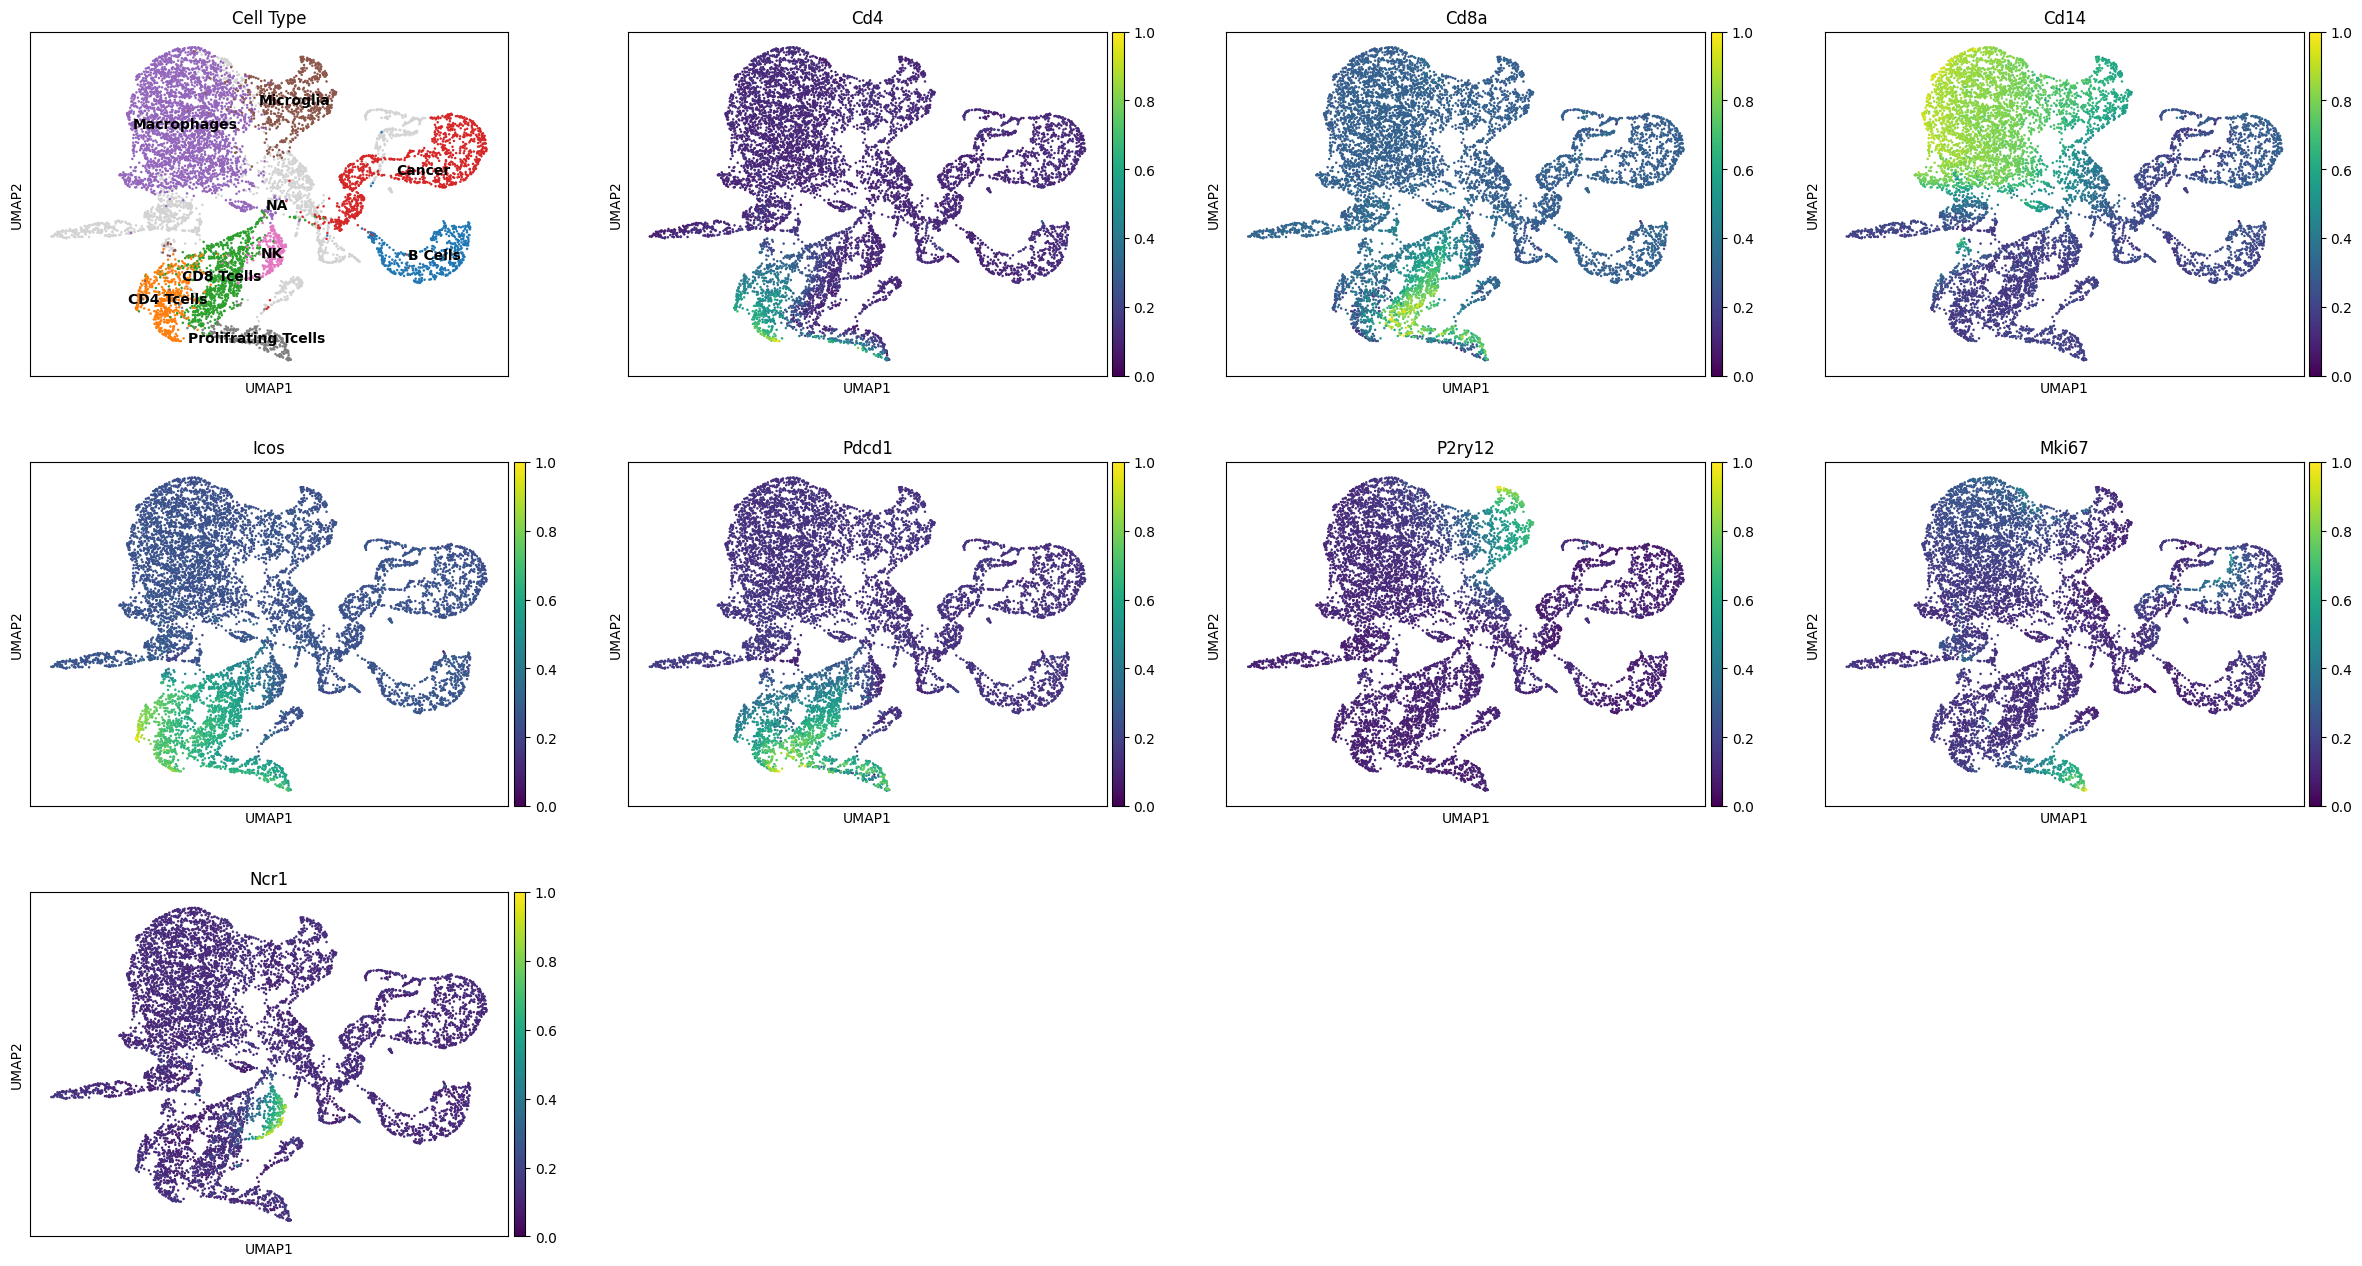

In [ ]:
sc.pl.umap(recon_obj, color=["Cell Type","Cd4","Cd8a","Cd14","Icos","Pdcd1","P2ry12","Mki67","Ncr1"], show=True, legend_loc='on data')

**Propagation based signature projection for actvation of Tcells**



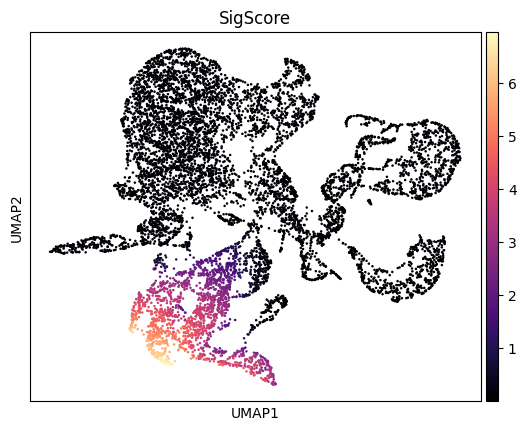

array([3.68619733e+00, 4.85992471e-02, 2.15269769e-03, ...,
       3.23222961e+00, 8.16724950e-02, 1.84996188e-02])

In [ ]:
scNET.run_signature(recon_obj, up_sig=["Zap70","Lck","Fyn","Cd3g","Cd28","Lat"],alpha = 0.9)

**And for Tumor aggression**

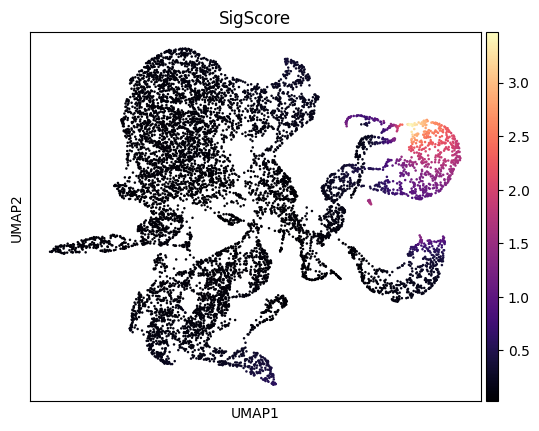

array([0.2341519 , 0.77511495, 1.48922037, ..., 0.42115738, 0.07155561,
       0.45944   ])

In [ ]:

scNET.run_signature(recon_obj,up_sig=["Cdkn2a","Myc","Pten","Kras"])


**Creating the co-embedded network, is it modular?**

In [ ]:
import networkx as nx
net, mod = scNET.build_co_embeded_network(embedded_genes, node_features)
print(f"The network mdularity: {mod}")

The network mdularity: 0.7993170877228127


##  Finding Downstream Transcription factors

### Re-embed the T-cells subset

In [ ]:
obj.obs["Cell Type"] = obj.obs["Cell Type"].apply(lambda x: "Tcells" if not x is None and str(x).find("Tcell") >=0 else x )

sub_obj = obj[obj.obs["Cell Type"] == "Tcells"]
scNET.run_scNET(sub_obj, pre_processing_flag=False, human_flag=False, number_of_batches=5, split_cells=False, max_epoch=300, model_name = "Tcells")
embedded_genes, embedded_cells, node_features , out_features =  scNET.load_embeddings("Tcells")
net, mod = scNET.build_co_embeded_network(embedded_genes, node_features)
print(f"The network mdularity: {mod}")

/usr/local/lib/python3.11/dist-packages/scNET/Data/format_h_sapiens.csv
N genes: (10181, 1760)
None
3


Training:  10%|█         | 30/300 [03:46<33:26,  7.43s/it]

0.9122959013662113


Training:  20%|██        | 60/300 [07:45<31:30,  7.88s/it]

0.9295419680035064


Training:  30%|███       | 90/300 [11:43<27:40,  7.91s/it]

0.9418641203976581


Training:  40%|████      | 120/300 [15:40<23:31,  7.84s/it]

0.9512088278854377


Training:  50%|█████     | 150/300 [19:21<18:18,  7.32s/it]

0.9613157894736842


Training:  60%|██████    | 180/300 [23:16<15:39,  7.83s/it]

0.9709143169997263


Training:  70%|███████   | 210/300 [27:09<11:36,  7.74s/it]

0.9771151993609173


Training:  80%|████████  | 240/300 [31:03<07:42,  7.70s/it]

0.9786231274196263


Training:  90%|█████████ | 270/300 [34:56<03:50,  7.70s/it]

0.9831932773109243


Training: 100%|██████████| 300/300 [38:48<00:00,  7.76s/it]

0.9884290498325586
Best Network AUC: 0.8878060447189737


### Find downstream TF's for a spesific gene signature

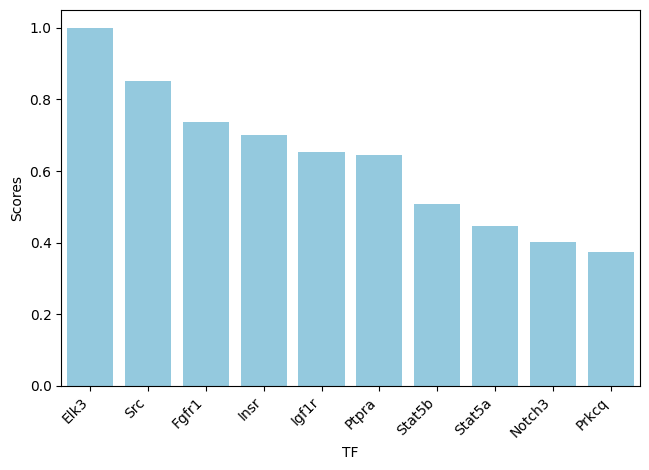

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

tf_scores = scNET.find_downstream_tfs(net, ["Zap70","Lck","Fyn","Cd3g","Cd28","Lat"]).sort_values(ascending=False).head(10)

ax = sns.barplot(x=tf_scores.index, y=tf_scores.values, color='skyblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
ax.set_xlabel('TF')
ax.set_ylabel('Scores')
plt.show()



**Finding differential enriched pathways**
### Can we see a difference in phenotype between the treatment and the negative control?








<Figure size 1000x3000 with 0 Axes>

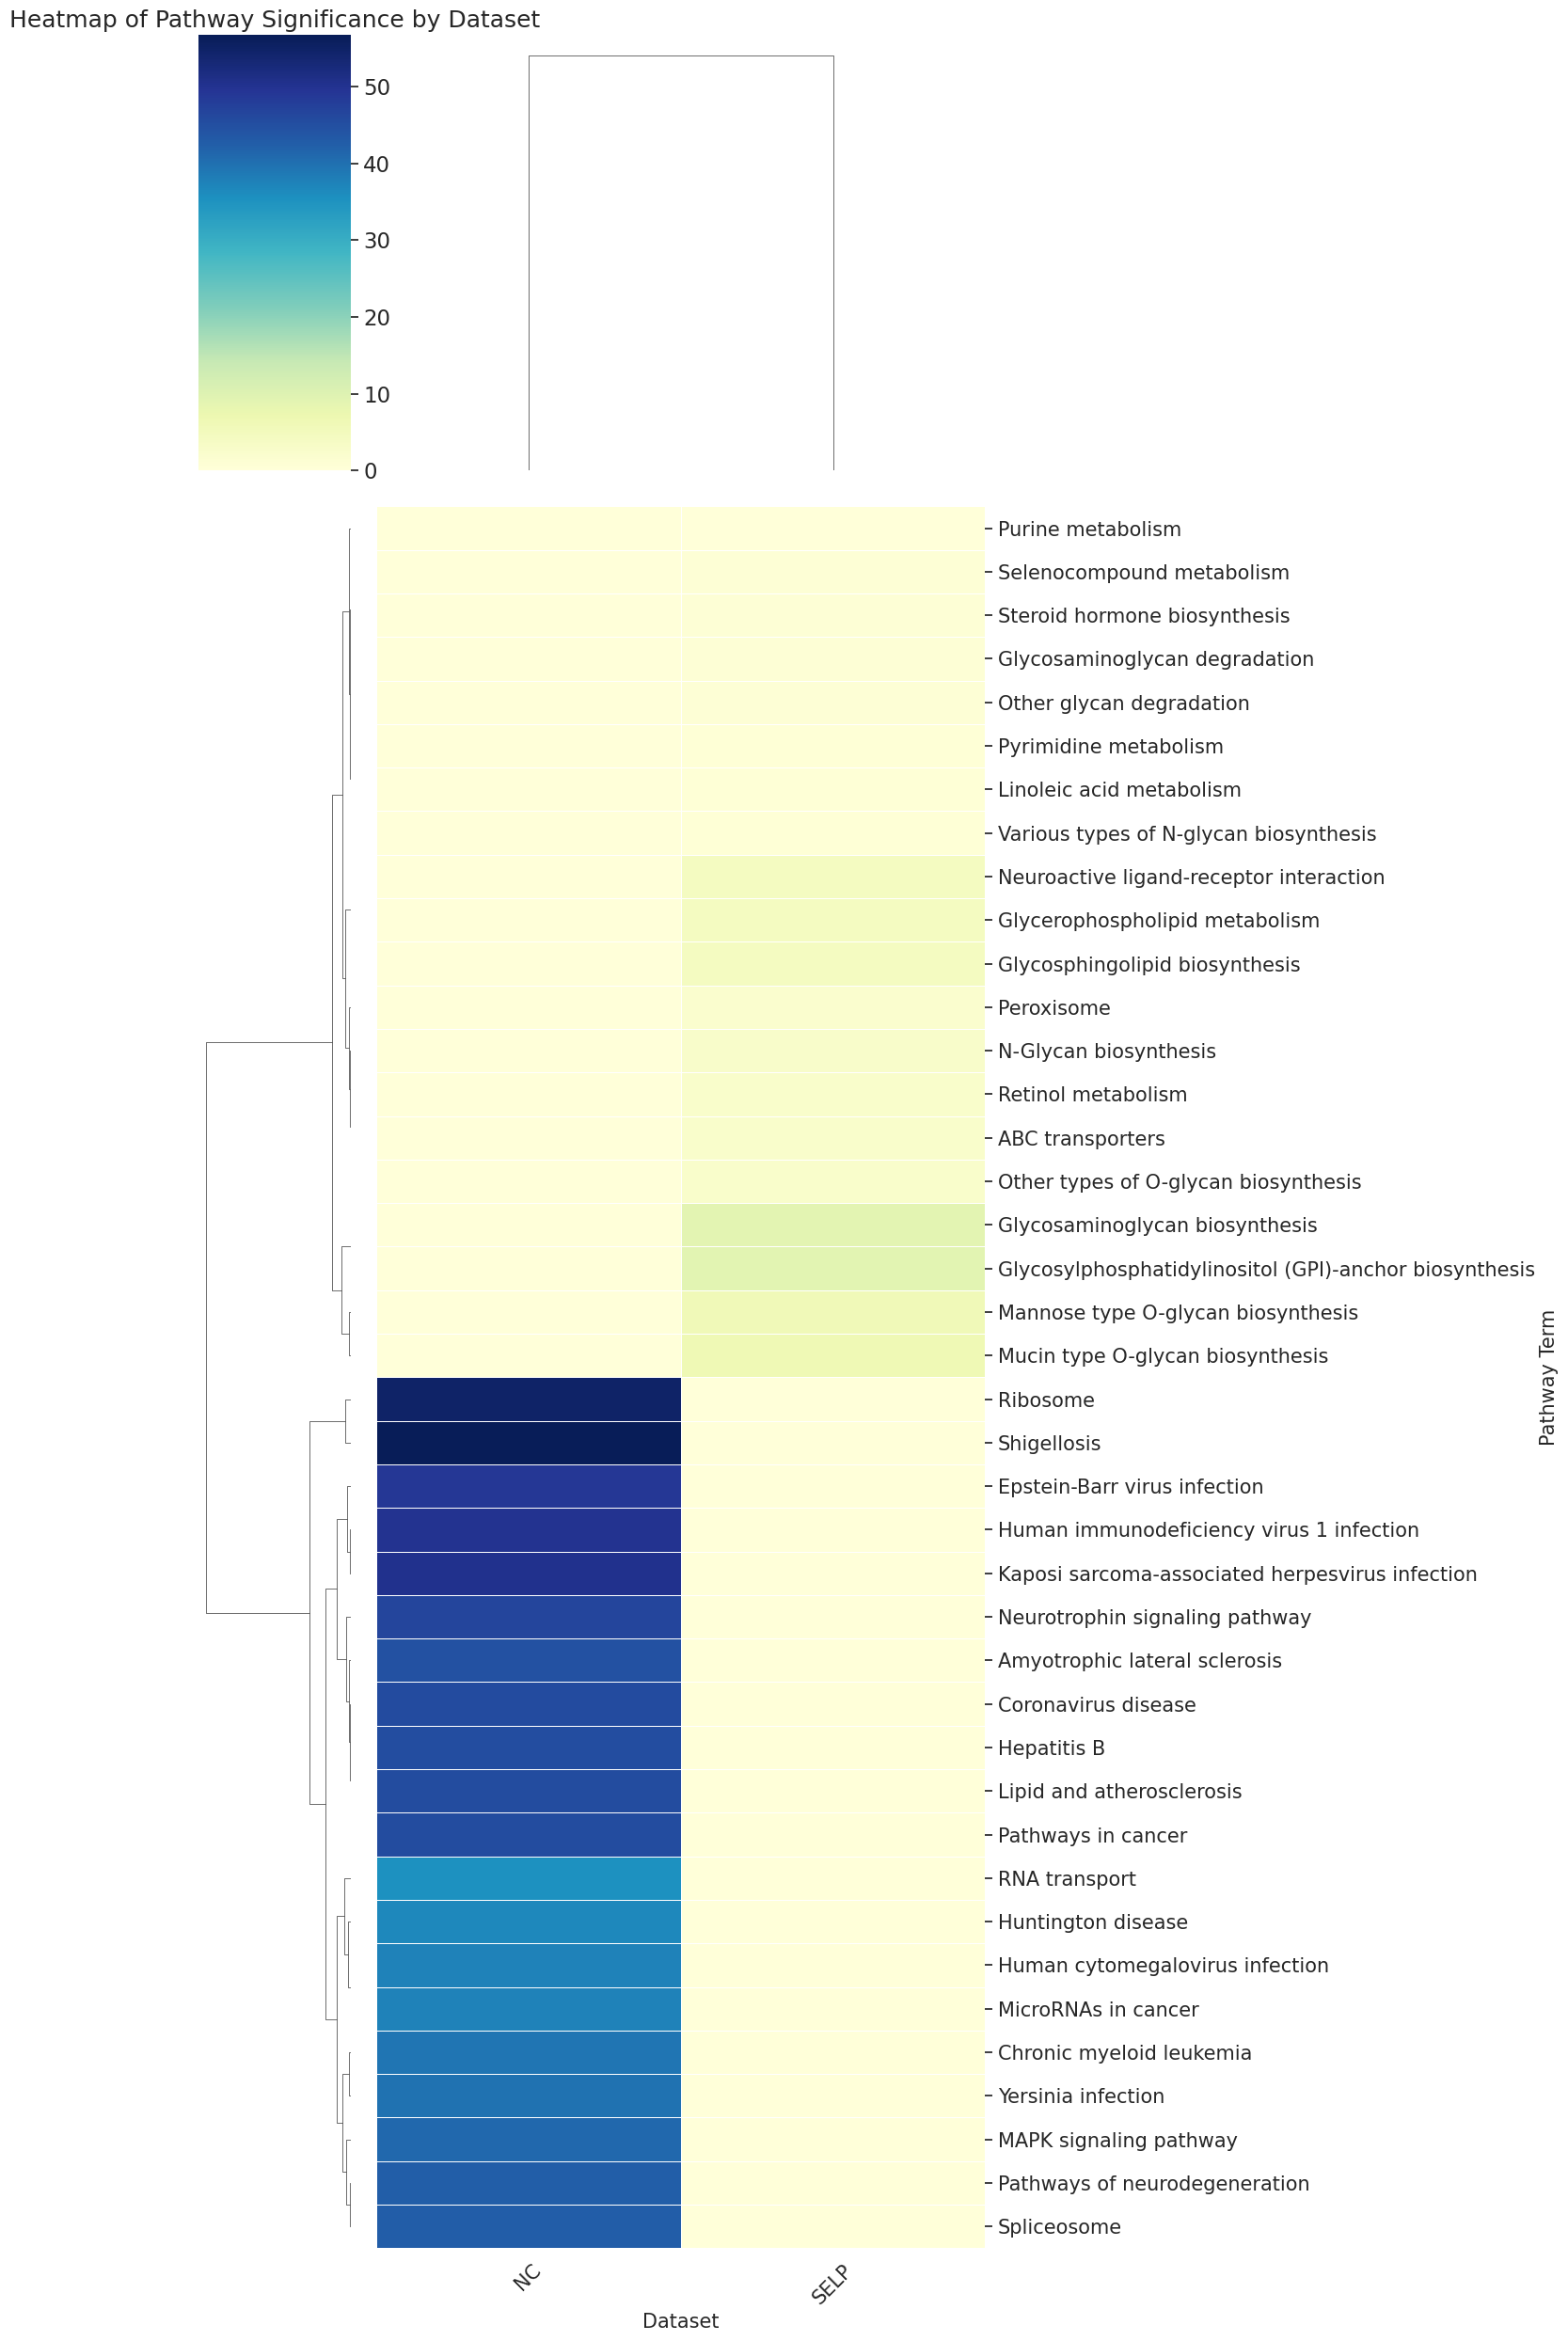

In [ ]:
recon_obj.obs["Cell Type"] = recon_obj.obs["Cell Type"].apply(lambda x: "Tcells" if not x is None and str(x).find("Tcell") >=0 else x )
recon_obj.obs["Tretment"] = list(map(lambda x:"SELP" if x.find("SELP")>=0 else "NC", recon_obj.obs.index))
de_genes_per_group, significant_pathways, filtered_kegg, enrichment_results = scNET.pathway_enricment(recon_obj.copy()[recon_obj.obs["Cell Type"].isin(["Cancer"])],groupby="Tretment")
scNET.plot_de_pathways(significant_pathways,enrichment_results)